# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Are SAT and ACT participation rates indicative of higher average test scores by state? 

### The SAT and ACT may not be a requirement moving forward for colleges in a post-Covid world. 
### Many colleges have dropped their requirement for an SAT/ACT score for the academic year of 2021. Some will keep it that way after 2021.
### This would mean a potentially significant loss of revenue for College Board.


Describe how things should work.
Explain the problem and state why it matters.
Explain your problem's financial costs.
Back up your claims.
Propose a solution.
Explain the benefits of your proposed solution(s).
Conclude by summarizing the problem and solution

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of your notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have a good README.md file.** 

Don't forget to cite your data sources!

*All libraries used should be added here*

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data


In [78]:
sat2017=pd.read_csv('./data/sat_2017.csv')
sat2018=pd.read_csv('./data/sat_2018.csv')
sat2019=pd.read_csv('./data/sat_2019.csv')
act2017=pd.read_csv('./data/act_2017.csv')
act2018=pd.read_csv('./data/act_2018.csv')
act2019=pd.read_csv('./data/act_2019.csv')

#### 2. Preview and inspect the data


In [79]:
sat2017.info() #checking datatypes
print(sat2017) #checking full data set for errors
act2017.info() #checking datatypes
print(act2017) #checking full data for errors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
                   State Participation  Evidence-Based Reading and Writing  \
0                Alabama            5%                                 593   
1                 Alaska           38%                                 547   
2                Arizona           30%                                 563   
3               Arkansas            3%                                 614   
4         

In [80]:
print(sat2017.shape)
print(act2017.shape)

(51, 5)
(52, 7)


#### 3. Look for errors in the data

#### 3a. Hint - Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [81]:
sat2017.info() #change participation to Float since it is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [82]:
act2017.info() 
#both act paricipation and composites are objects and not floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4. Fix any errors you identified

In [83]:
mask=(sat2017['Math']<200) | (sat2017["Math"]>800) 
sat2017[mask]
#mask showed Maryland had error in math value. Supposed to be 524 according to https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [84]:
sat2017.at[20,"Math"]=524 
# learned .at function from https://www.askpython.com/python-modules/pandas/update-the-value-of-a-row-dataframe

In [85]:
sat2017["Participation"] = sat2017["Participation"].apply(lambda x: x.replace("%", "")) 
#code borrowed from source https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe

In [86]:
act2017["Composite"] = act2017["Composite"].apply(lambda x: x.replace("x", "")) #dropped "x" from value

In [87]:
act2017["Participation"] = act2017["Participation"].apply(lambda x: x.replace("%", "")) 
#drop the % sign to be able to convert participation rates into floats

#### 5. Fix any incorrect data types

In [88]:
sat2017=sat2017.astype({'Participation':(float)}) #switch values from objects to float

In [89]:
act2017=act2017.astype({'Participation':(float)}) #switch both columns to floats

In [90]:
act2017=act2017.astype({'Composite':(float)}) #tried to switch but could not switch types because of value having the letter "x" attached

#### 6. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference between the SAT columns and the ACT columns. Remember that you have data from multiple years.

- Column names should be all lowercase
- Column names should not contain spaces 
- Column names should be unique and informative

In [91]:
sat2017.rename(columns={"Evidence-Based Reading and Writing": "2017_sat_verbal"}, inplace=True) 

In [92]:
sat2017.rename(columns={"State": "state"}, inplace=True) 

In [93]:
sat2017.rename(columns={"Math": "2017_sat_math"}, inplace=True) 

In [94]:
sat2017.rename(columns={"Participation":"2017_sat_participation" }, inplace=True)

In [95]:
sat2017.rename(columns={"Total":"2017_total_score" }, inplace=True)

In [96]:
act2017.rename(columns={"Participation":"2017_act_participation"},inplace=True)

In [97]:
act2017.rename(columns={"State":"state"},inplace=True)

In [98]:
act2017.rename(columns={"Composite":"2017_composite"},inplace=True)

#### 7. Create a data dictionary

Now that you've fixed our data and given it appropriate names, create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [99]:
sat2017_state=sat2017['state']
sat2017_paricipation=sat2017['2017_sat_participation']
sat2017_verbal=sat2017['2017_sat_verbal']
sat2017_math=sat2017['2017_sat_math']
act2017_state=act2017['state']
act2017_participation=act2017['2017_act_participation']
act2017_composite=act2017['2017_composite']

|Feature|Type|Dataset|Description|
|---|---|---|---|
**sat2017_state**|*object*|2017 SAT| The name of the state/province in the United States of America that took the SAT in 2017.
**sat2017_participation**|*float*|2017 SAT| The percentage of 2017 SAT participation in the state/province.
**sat2017_verbal**|*integer*|2017 SAT| The average score of the verbal section of SAT in a given state/province in 2017.
**sat2017_math**|*integer*|2017 SAT| The average score of the math section of the SAT in a given state/province in 2017.
**act2017_state**|*object*|2017 ACT| The name of the state/province in the United States of America that took the ACT in 2017.
**act2017_participation**|*float*|2017 ACT| The percentage of ACT participation in the state/province in 2017.
**act2017_composite**|*float*|2017 ACT| The average composite score of a state/province in 2017.

#### 8. Drop any unnecessary rows

In [100]:
#For ACT I dropped the individual subjects and just focused on composite scores 
act2017.drop("English",1,inplace=True)
act2017.drop('Math',1, inplace=True)
act2017.drop('Reading',1,inplace=True)
act2017.drop('Science',1,inplace=True)

In [101]:
act2017.drop([0]) #dropped "National row because it is not relevant to average composite score by state"

,state,2017_act_participation,2017_composite
1,Alabama,100.0,19.2
2,Alaska,65.0,19.8
3,Arizona,62.0,19.7
4,Arkansas,100.0,19.4
5,California,31.0,22.8
6,Colorado,100.0,20.8
7,Connecticut,31.0,25.2
8,Delaware,18.0,24.1
9,District of Columbia,32.0,24.2
10,Florida,73.0,19.8


#### 9. Merge Dataframes

Join the 2017 ACT and SAT DataFrames using the _state_ in each DataFrame as the key.

In [102]:
combined_2017= pd.merge(left=sat2017, right=act2017, how='inner')

#### 10. Save your cleaned, merged dataframe

Use a relative path to save your data as `combined_2017.csv`.

In [103]:
combined_2017.to_csv('./data/combined_2017.csv', index=False)

## 2018 & 2019 Data Import and Cleaning

Read in the 2018 data. Inspect and clean. Save. Do the same with the 2019 data.

In [104]:
sat2018=pd.read_csv('./data/sat_2018.csv')
sat2019=pd.read_csv('./data/sat_2019.csv')
act2018=pd.read_csv('./data/act_2018.csv')
act2019=pd.read_csv('./data/act_2019.csv')

In [105]:
act2018.info() #checking datatypes
print(act2018) #checking full data for errors
sat2019.info() #checking datatypes
print(sat2019) #checking full data set for errors
act2019.info() #checking datatypes
print(act2019) #checking full data for errors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
                   State Participation  Composite
0                Alabama          100%       19.1
1                 Alaska           33%       20.8
2                Arizona           66%       19.2
3               Arkansas          100%       19.4
4             California           27%       22.7
5               Colorado           30%       23.9
6            Connecticut           26%       25.6
7               Delaware           17%       23.8
8   District of columbia           32%       23.6
9                Florida           66%       19.9
10               Georgia           53%       21.4
11                Hawaii  

In [106]:
sat2018.info() #checking datatypes
sat2018 #checking full data set for errors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [107]:
sat2018["Participation"] = sat2018["Participation"].apply(lambda x: x.replace("%", "")) 

In [108]:
sat2018=sat2018.astype({'Participation':(float)})

In [109]:
sat2018.rename(columns={"Evidence-Based Reading and Writing": "2018_sat_verbal"}, inplace=True) 

In [110]:
sat2018.rename(columns={"Participation": "2018_sat_participation"}, inplace=True) 

In [111]:
sat2018.rename(columns={"Math": "2018_sat_math"}, inplace=True) 

In [112]:
sat2018.rename(columns={"State": "state"}, inplace=True) 

In [113]:
sat2018.rename(columns={"Total":"2018_total_score" }, inplace=True)

In [114]:
act2018.rename(columns={"Participation":"2018_act_participation"},inplace=True)

In [115]:
act2018.rename(columns={"State":"state"},inplace=True)

In [116]:
act2018.rename(columns={"Composite":"2018_composite"},inplace=True)

In [117]:
act2018['state'].replace("District of columbia",'District of Columbia', inplace=True)
#columbia needs to be capitalized

In [118]:
act2018.drop([20],inplace=True) #dropped duplicate "Maine"

In [119]:
sat2019.info()#participation rate is object but needs to be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [120]:
sat2019["Participation Rate"] = sat2019["Participation Rate"].apply(lambda x: x.replace("%", "")) 

In [121]:
sat2019.drop([47],inplace=True) #dropped Virgin Islands

In [122]:
sat2019.drop([39],inplace=True) #dropped Puerto Rico

In [123]:
sat2019=sat2019.astype({'Participation Rate':(float)})

In [124]:
sat2019.rename(columns={"EBRW": "2019_sat_verbal"}, inplace=True)

In [125]:
sat2019.rename(columns={"Participation Rate": "2019_sat_participation"}, inplace=True) 

In [126]:
sat2019.rename(columns={"Math": "2019_sat_math"}, inplace=True) 

In [127]:
sat2019.rename(columns={"State": "state"}, inplace=True) 

In [128]:
sat2019.rename(columns={"Total":"2019_total_score" }, inplace=True)

In [129]:
act2019.rename(columns={"Participation":"2019_act_participation"},inplace=True)

In [130]:
act2019.rename(columns={"State":"state"},inplace=True)

In [131]:
act2019.rename(columns={"Composite":"2019_composite"},inplace=True)

In [132]:
act2019.drop([51],inplace=True) #dropped "National" from values

In [133]:
act2019['2019_act_participation'] = act2019['2019_act_participation'].apply(lambda x: x.replace("%", "")) 

In [134]:
act2019=act2019.astype({'2019_act_participation':(float)})

In [135]:
act2018['2018_act_participation'] = act2018['2018_act_participation'].apply(lambda x: x.replace("%", "")) 

In [136]:
act2018=act2018.astype({'2018_act_participation':(float)})

In [137]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   2018_act_participation  51 non-null     float64
 2   2018_composite          51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [138]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   2018_sat_participation  51 non-null     float64
 2   2018_sat_verbal         51 non-null     int64  
 3   2018_sat_math           51 non-null     int64  
 4   2018_total_score        51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [139]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   2019_act_participation  51 non-null     float64
 2   2019_composite          51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [140]:
sat2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   2019_sat_participation  51 non-null     float64
 2   2019_sat_verbal         51 non-null     int64  
 3   2019_sat_math           51 non-null     int64  
 4   2019_total_score        51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


####                                                          Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
**sat2017**|*Dataframe*|2017 SAT| Dataframe of average SAT scores and participation rates in 2017 in United States of America by state/province.
**sat2017_state**|*object*|2017 SAT| The name of the state/province in the United States of America that took the SAT in 2017.
**sat2017_participation**|*float*|2017 SAT| The percentage of 2017 SAT participation in the state/province.
**sat2017_verbal**|*integer*|2017 SAT| The average score of the verbal section of SAT in a given state/province in 2017.
**sat2017_math**|*integer*|2017 SAT| The average score of the math section of the SAT in a given state/province in 2017.
**act2017**|*Dataframe*|2017 ACT| Dataframe of average ACT scores and participation rates in 2017 in United States of America by state/province.
**act2017_state**|*object*|2017 ACT| The name of the state/province in the United States of America that took the ACT in 2017.
**act2017_participation**|*float*|2017 ACT| The percentage of ACT participation in the state/province in 2017.
**act2017_composite**|*float*|2017 ACT| The average composite score of a state/province in 2017.
**sat2018**|*Dataframe*|2018 SAT| Dataframe of average SAT scores and participation rates in 2018 in United States of America by state/province.
**sat2018_state**|*object*|2018 SAT| The name of the state/province in the United States of America that took the SAT in 2018.
**sat2018_participation**|*float*|2018 SAT| The percentage of 2018 SAT participation in the state/province.
**sat2018_verbal**|*integer*|2018 SAT| The average score of the verbal section of SAT in a given state/province in 2018.
**sat2018_math**|*integer*|2018 SAT| The average score of the math section of the SAT in a given state/province in 2018.
**act2018**|*Dataframe*|2018 ACT| Dataframe of average ACT scores and participation rates in 2018 in United States of America by state/province.
**act2018_state**|*object*|2018 ACT| The name of the state/province in the United States of America that took the ACT in 2018.
**act2018_participation**|*float*|2018 ACT| The percentage of ACT participation in the state/province in 2018.
**act2018_composite**|*float*|2018 ACT| The average composite score of a state/province in 2018.
**sat2019**|*Dataframe*|2019 SAT| Dataframe of average SAT scores and participation rates in 2019 in United States of America by state/province.
**sat2019_state**|*object*|2019 SAT| The name of the state/province in the United States of America that took the SAT in 2019.
**sat2019_participation**|*float*|2019 SAT| The percentage of 2019 SAT participation in the state/province.
**sat2019_verbal**|*integer*|2019 SAT| The average score of the verbal section of SAT in a given state/province in 2019.
**sat2019_math**|*integer*|2019 SAT| The average score of the math section of the SAT in a given state/province in 2019.
**act2019**|*Dataframe*|2019 ACT| Dataframe of average ACT scores and participation rates in 2019 in United States of America by state/province.
**act2019_state**|*object*|2019 ACT| The name of the state/province in the United States of America that took the ACT in 2019.
**act2019_participation**|*float*|2019 ACT| The percentage of ACT participation in the state/province in 2019.
**act2019_composite**|*float*|2019 ACT| The average composite score of a state/province in 2019.
**combined_2017**|*Dataframe*|2017 SAT/2017 ACT| Dataframe of both SAT & ACT scores and participation rates in 2017 in United States of America by state/province.
**combined_2018**|*Dataframe*|2018 SAT/2018 ACT| Dataframe of both SAT & ACT scores and participation rates in 2018 in United States of America by state/province.
**combined_2019**|*Dataframe*|2019 SAT/2019 ACT| Dataframe of both SAT & ACT scores and participation rates in 2019 in United States of America by state/province.
**final**|*Dataframe*|2017-2019 SAT/ACT| Dataframe of SAT & ACT scores and participation rates during the years 2017 to 2019 in United States of America by state/province.

In [141]:
combined_2018= pd.merge(left=sat2018, right=act2018, how='inner')

In [142]:
combined_2018.to_csv('./data/combined_2018.csv', index=False)

In [143]:
combined_2019= pd.merge(left=sat2019, right=act2019, how='inner')

In [144]:
combined_2019.to_csv('./data/combined_2019.csv', index=False)

## Combine your 2017, 2018, and 2019 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. 

Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged DataFrame as `final.csv`.

**Use this combined DataFrame for the remainder of the project**.

In [145]:
from functools import reduce
final_df= [combined_2017,combined_2018,combined_2019]
final = reduce(lambda left,right: pd.merge(left,right,on='state'),final_df)
#borrowed code from https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [146]:
final.to_csv('./data/final.csv', index=False)

In [147]:
sat2018_state=final['state']
sat2018_paricipation=final['2018_sat_participation']
sat2018_verbal=final['2018_sat_verbal']
sat2018_math=final['2018_sat_math']
act2018_state=final['state']
act2018_participation=final['2018_act_participation']
act2018_composite=final['2018_composite']
sat2019_state=final['state']
sat2019_paricipation=final['2019_sat_participation']
sat2019_verbal=final['2019_sat_verbal']
sat2019_math=final['2019_sat_math']
act2019_state=final['state']
act2019_participation=final['2019_act_participation']
act2019_composite=final['2019_composite']

In [148]:
final.info() #final check to make sure all data types are good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   2017_sat_participation  51 non-null     float64
 2   2017_sat_verbal         51 non-null     int64  
 3   2017_sat_math           51 non-null     int64  
 4   2017_total_score        51 non-null     int64  
 5   2017_act_participation  51 non-null     float64
 6   2017_composite          51 non-null     float64
 7   2018_sat_participation  51 non-null     float64
 8   2018_sat_verbal         51 non-null     int64  
 9   2018_sat_math           51 non-null     int64  
 10  2018_total_score        51 non-null     int64  
 11  2018_act_participation  51 non-null     float64
 12  2018_composite          51 non-null     float64
 13  2019_sat_participation  51 non-null     float64
 14  2019_sat_verbal         51 non-null     int6

# Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [179]:
stats_final=final.describe().transpose()

In [181]:
stats_final

,count,mean,std,min,25%,50%,75%,max
2017_sat_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
2017_sat_verbal,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
2017_sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
2017_total_score,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
2017_act_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
2018_sat_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
2018_sat_verbal,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
2018_sat_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
2018_total_score,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0


## Investigate trends in the data
Using sorting to consider the following questions:

- Which states have the highest and lowest participation rates for each test for each year?
- Which states have the highest and lowest mean total/composite scores for each test for each year?
- Which states have large changes in participation or scores?

Based on what you've just observed, have you identified any states that you're especially interested in? If so, why?

#### Top 5 and Bottom 5 Sorting

In [150]:
#sorted DFs state by participation rate top 5 
sat_part_2017_top5=final.sort_values(by=['2017_sat_participation']).head()
sat_part_2018_top5=final.sort_values(by=['2018_sat_participation']).head()
sat_part_2019_top5=final.sort_values(by=['2019_sat_participation']).head()
act_part_2017_top5=final.sort_values(by=['2017_act_participation']).head()
act_part_2018_top5=final.sort_values(by=['2018_act_participation']).head()
act_part_2019_top5=final.sort_values(by=['2019_act_participation']).head()

In [151]:
#sorted DFs state by participation rate bottom 5
sat_part_2017_bottom5=final.sort_values(by=['2017_sat_participation']).tail()
sat_part_2018_bottom5=final.sort_values(by=['2018_sat_participation']).tail()
sat_part_2019_bottom5=final.sort_values(by=['2019_sat_participation']).tail()
act_part_2017_bottom5=final.sort_values(by=['2017_act_participation']).tail()
act_part_2018_bottom5=final.sort_values(by=['2018_act_participation']).tail()
act_part_2019_bottom5=final.sort_values(by=['2019_act_participation']).tail()


In [152]:
#sorted DFs state by participation rate top 5 and bottom 5
sat2017_participation_top5_bottom5=pd.concat([sat_part_2017_top5,sat_part_2017_bottom5])
sat2018_participation_top5_bottom5=pd.concat([sat_part_2018_top5,sat_part_2018_bottom5])
sat2019_participation_top5_bottom5=pd.concat([sat_part_2019_top5,sat_part_2019_bottom5])
act2017_participation_top5_bottom5=pd.concat([act_part_2017_top5,act_part_2017_bottom5])
act2018_participation_top5_bottom5=pd.concat([act_part_2018_top5,act_part_2018_bottom5])
act2019_participation_top5_bottom5=pd.concat([act_part_2019_top5,act_part_2019_bottom5])


In [153]:
#sorted DFs state by participation rate top 5 and bottom 5 in ascending order
sat_2017_part_sorted= sat2017_participation_top5_bottom5.sort_values(by='2017_sat_participation',ascending=True)
sat_2018_part_sorted= sat2018_participation_top5_bottom5.sort_values(by='2018_sat_participation',ascending=True)
sat_2019_part_sorted= sat2019_participation_top5_bottom5.sort_values(by='2019_sat_participation',ascending=True)
act_2017_part_sorted= act2017_participation_top5_bottom5.sort_values(by='2017_act_participation',ascending=True)
act_2018_part_sorted= act2018_participation_top5_bottom5.sort_values(by='2018_act_participation',ascending=True)
act_2019_part_sorted= act2019_participation_top5_bottom5.sort_values(by='2019_act_participation',ascending=True)

In [154]:
#top 5 total SAT score and ACT composite score
sat_2017_total_score_top5=final.sort_values(by=['2017_total_score']).head()
sat_2018_total_score_top5=final.sort_values(by=['2018_total_score']).head()
sat_2019_total_score_top5=final.sort_values(by=['2019_total_score']).head()
act_2017_composite_top5=final.sort_values(by=['2017_composite']).head()
act_2018_composite_top5=final.sort_values(by=['2018_composite']).head()
act_2019_composite_top5=final.sort_values(by=['2019_composite']).head()

In [155]:
#bottom 5 total SAT score and ACT composite score
sat_2017_total_score_bottom5=final.sort_values(by=['2017_total_score']).tail()
sat_2018_total_score_bottom5=final.sort_values(by=['2018_total_score']).tail()
sat_2019_total_score_bottom5=final.sort_values(by=['2019_total_score']).tail()
act_2017_composite_bottom5=final.sort_values(by=['2017_composite']).tail()
act_2018_composite_bottom5=final.sort_values(by=['2018_composite']).tail()
act_2019_composite_bottom5=final.sort_values(by=['2019_composite']).tail()

In [156]:
#sorted DFs state by SAT score and ACT top 5 and bottom 5
sat2017_total_top5_bottom5=pd.concat([sat_2017_total_score_top5,sat_2017_total_score_bottom5])
sat2018_total_top5_bottom5=pd.concat([sat_2018_total_score_top5,sat_2018_total_score_bottom5])
sat2019_total_top5_bottom5=pd.concat([sat_2019_total_score_top5,sat_2019_total_score_bottom5])
act2017_comp_top5_bottom5=pd.concat([act_2017_composite_top5,act_2017_composite_bottom5])
act2018_comp_top5_bottom5=pd.concat([act_2018_composite_top5,act_2018_composite_bottom5])
act2019_comp_top5_bottom5=pd.concat([act_2019_composite_top5,act_2019_composite_bottom5])

In [157]:
#sorted DFs state by participation rate top 5 and bottom 5 in ascending order
sat_2017_total_sorted= sat2017_total_top5_bottom5.sort_values(by='2017_total_score',ascending=True)
sat_2018_total_sorted= sat2018_participation_top5_bottom5.sort_values(by='2018_total_score',ascending=True)
sat_2019_total_sorted= sat2019_participation_top5_bottom5.sort_values(by='2019_total_score',ascending=True)
act_2017_comp_sorted= act2017_comp_top5_bottom5.sort_values(by='2017_composite',ascending=True)
act_2018_comp_sorted= act2018_comp_top5_bottom5.sort_values(by='2018_composite',ascending=True)
act_2019_comp_sorted= act2019_comp_top5_bottom5.sort_values(by='2019_composite',ascending=True)

### Horizontal Bar Graphs of Top 5 and Bottom 5

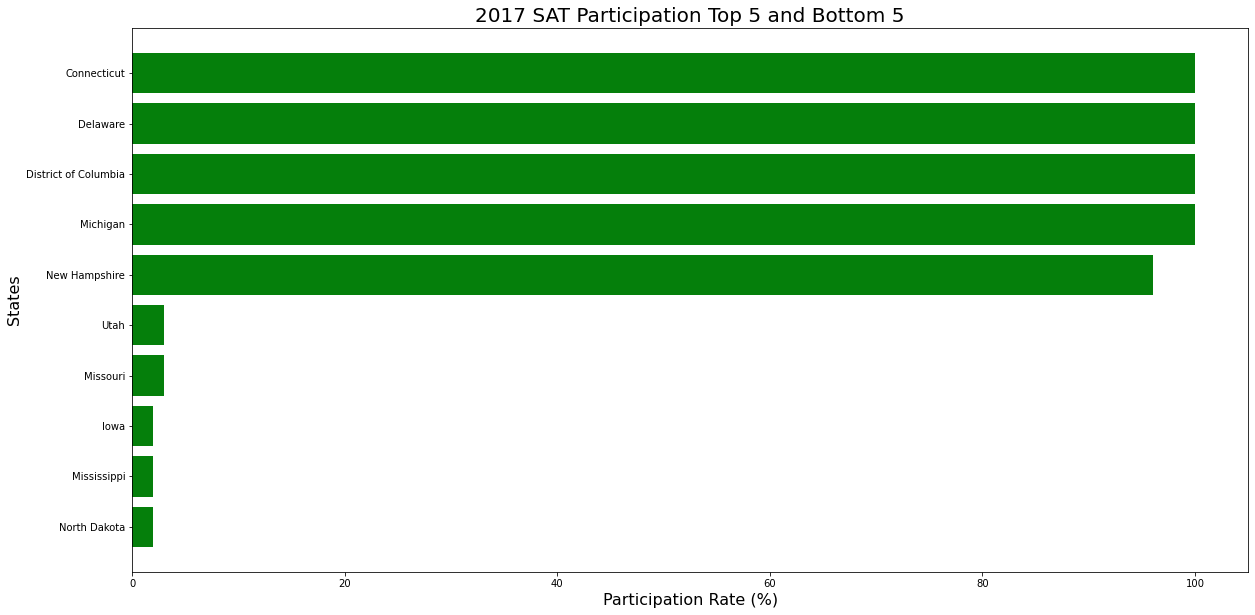

In [158]:
plt.figure(figsize=(20,10));
plt.barh(y=sat_2017_part_sorted['state'], width=sat_2017_part_sorted['2017_sat_participation'], color='#057f0b');
plt.title('2017 SAT Participation Top 5 and Bottom 5',fontsize=20); 
plt.ylabel('States',fontsize=16); 
plt.xlabel('Participation Rate (%)', fontsize=16);

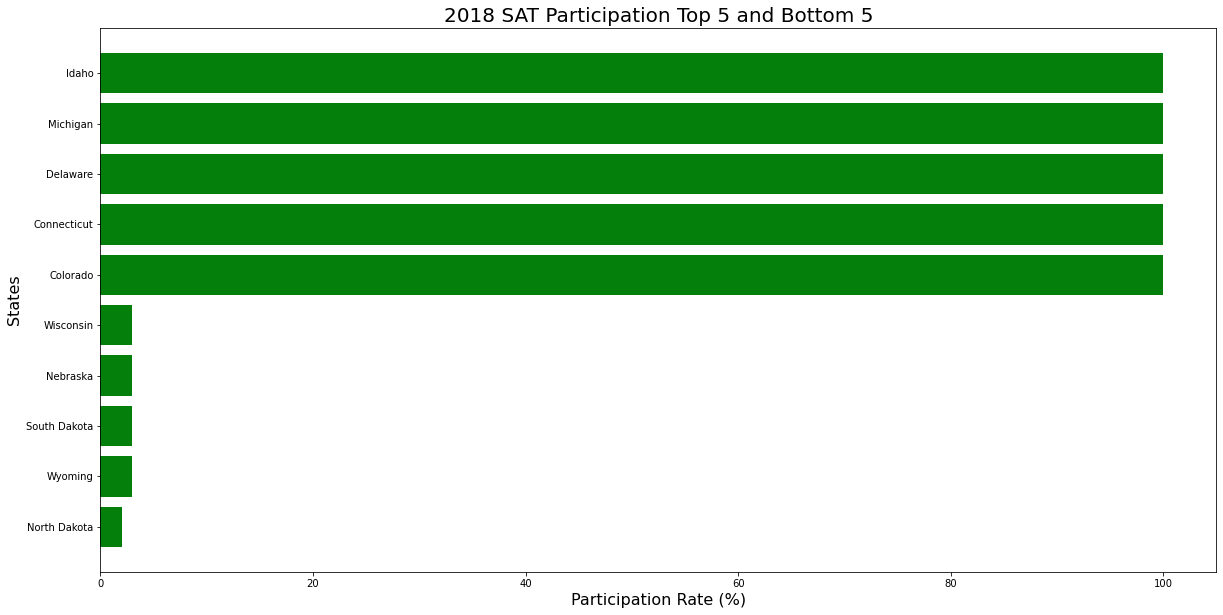

In [159]:
plt.figure(figsize=(20,10));
plt.barh(y=sat_2018_part_sorted['state'], width=sat_2018_part_sorted['2018_sat_participation'],color='#057f0b');
plt.title('2018 SAT Participation Top 5 and Bottom 5',fontsize=20); 
plt.ylabel('States',fontsize=16); 
plt.xlabel('Participation Rate (%)', fontsize=16);

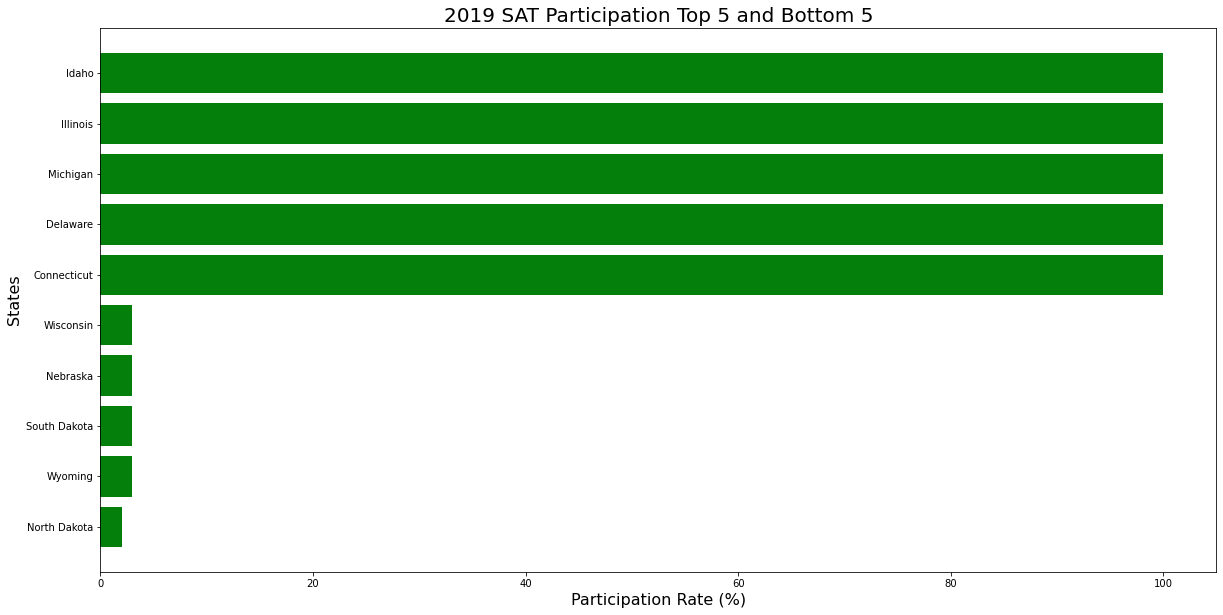

In [160]:
plt.figure(figsize=(20,10));
plt.barh(y=sat_2019_part_sorted['state'], width=sat_2019_part_sorted['2019_sat_participation'],color='#057f0b');
plt.title('2019 SAT Participation Top 5 and Bottom 5',fontsize=20); 
plt.ylabel('States',fontsize=16); 
plt.xlabel('Participation Rate (%)', fontsize=16);

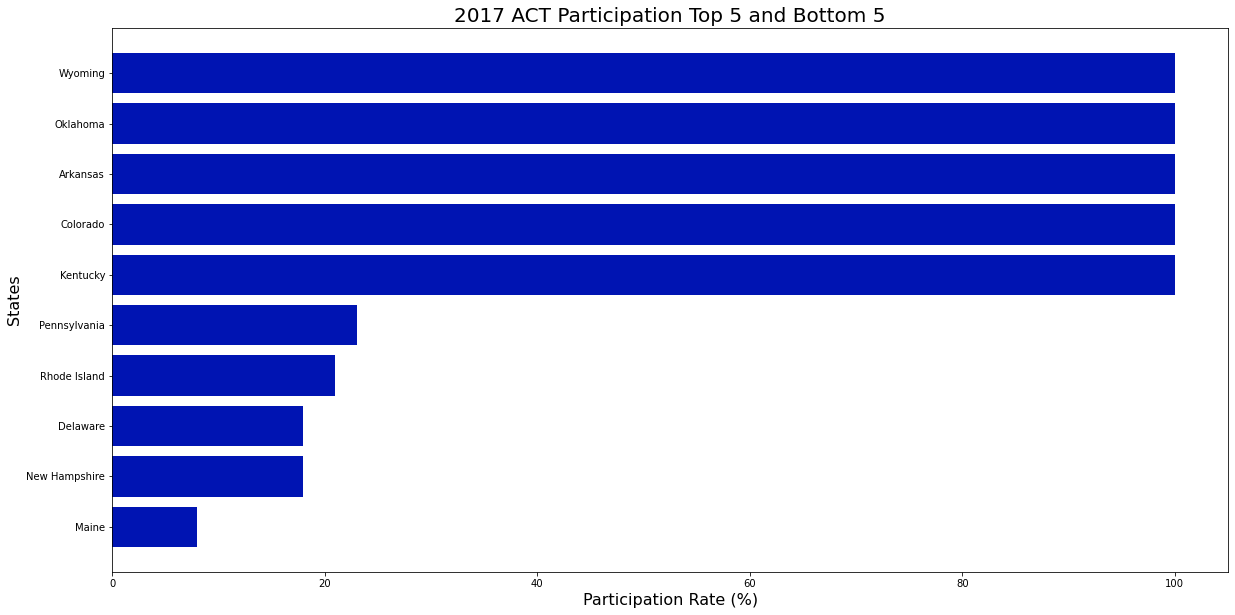

In [161]:
plt.figure(figsize=(20,10));
plt.barh(y=act_2017_part_sorted['state'], width=act_2017_part_sorted['2017_act_participation'],color="#0014b2");
plt.title('2017 ACT Participation Top 5 and Bottom 5',fontsize=20); 
plt.ylabel('States',fontsize=16); 
plt.xlabel('Participation Rate (%)', fontsize=16);

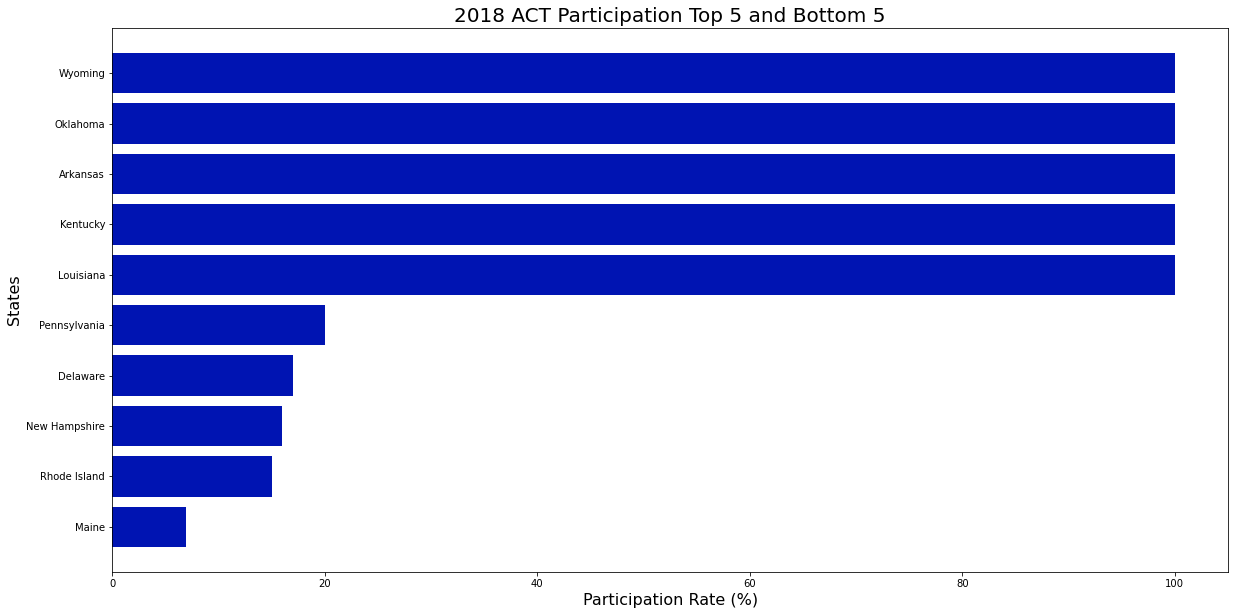

In [162]:
plt.figure(figsize=(20,10));
plt.barh(y=act_2018_part_sorted['state'], width=act_2018_part_sorted['2018_act_participation'],color="#0014b2");
plt.title('2018 ACT Participation Top 5 and Bottom 5',fontsize=20); 
plt.ylabel('States',fontsize=16); 
plt.xlabel('Participation Rate (%)', fontsize=16);

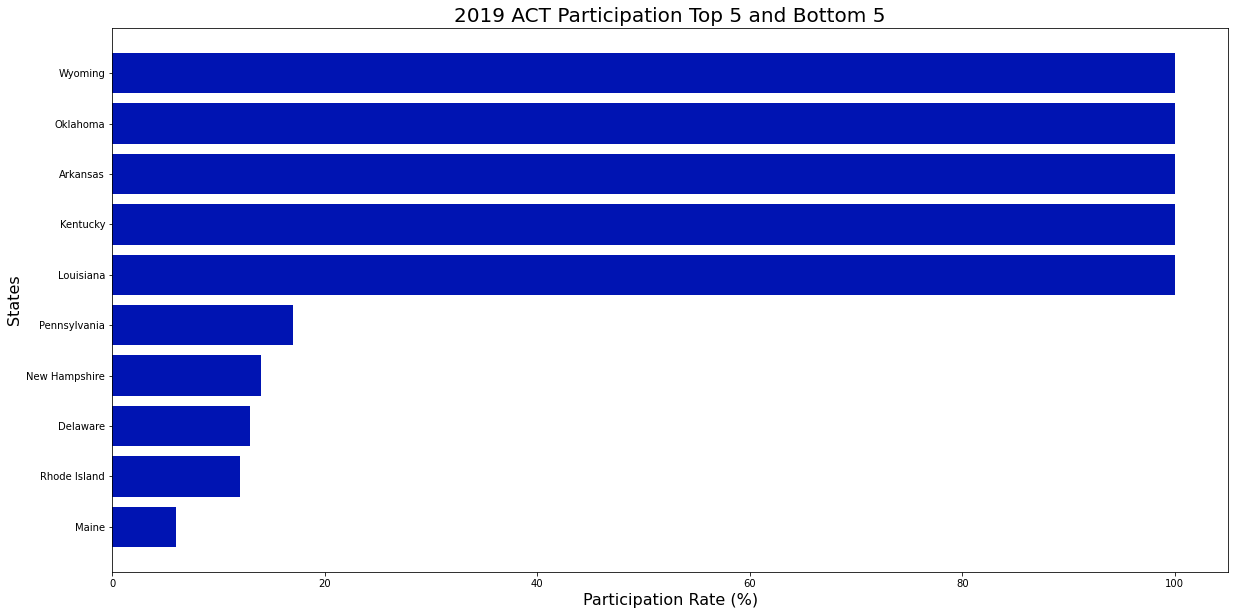

In [163]:
plt.figure(figsize=(20,10));
plt.barh(y=act_2019_part_sorted['state'], width=act_2019_part_sorted['2019_act_participation'],color="#0014b2");
plt.title('2019 ACT Participation Top 5 and Bottom 5',fontsize=20); 
plt.ylabel('States',fontsize=16); 
plt.xlabel('Participation Rate (%)', fontsize=16);

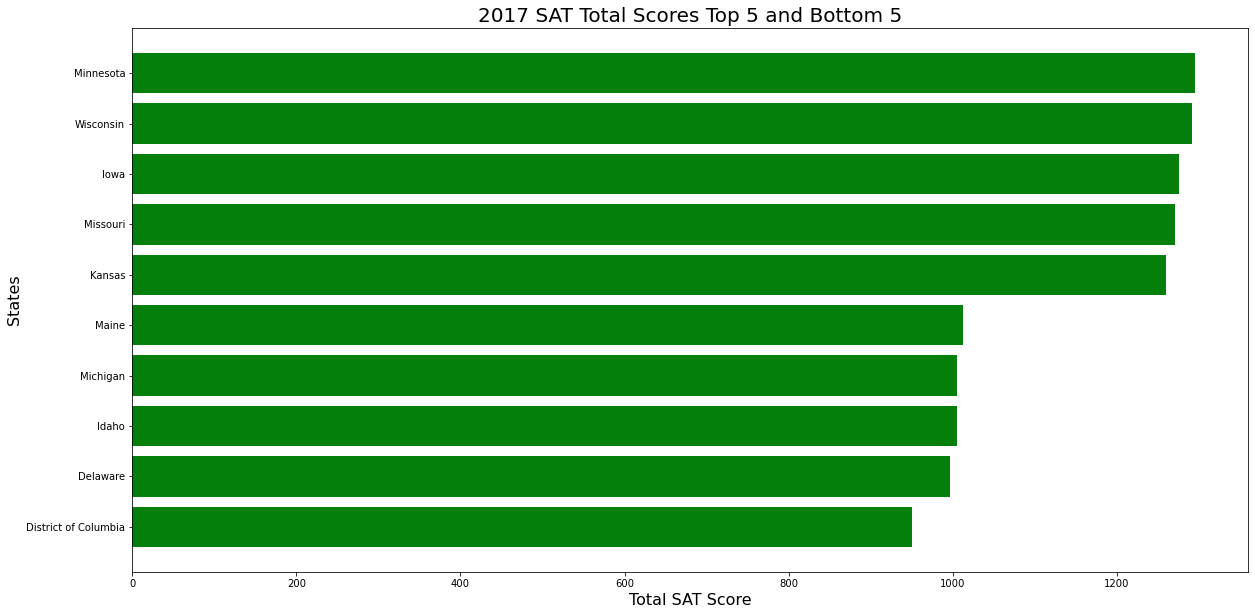

In [164]:
plt.figure(figsize=(20,10));
plt.barh(y=sat_2017_total_sorted['state'], width=sat_2017_total_sorted["2017_total_score"],color='#057f0b');
plt.title('2017 SAT Total Scores Top 5 and Bottom 5',fontsize=20)  
plt.ylabel('States',fontsize=16); 
plt.xlabel('Total SAT Score', fontsize=16);   

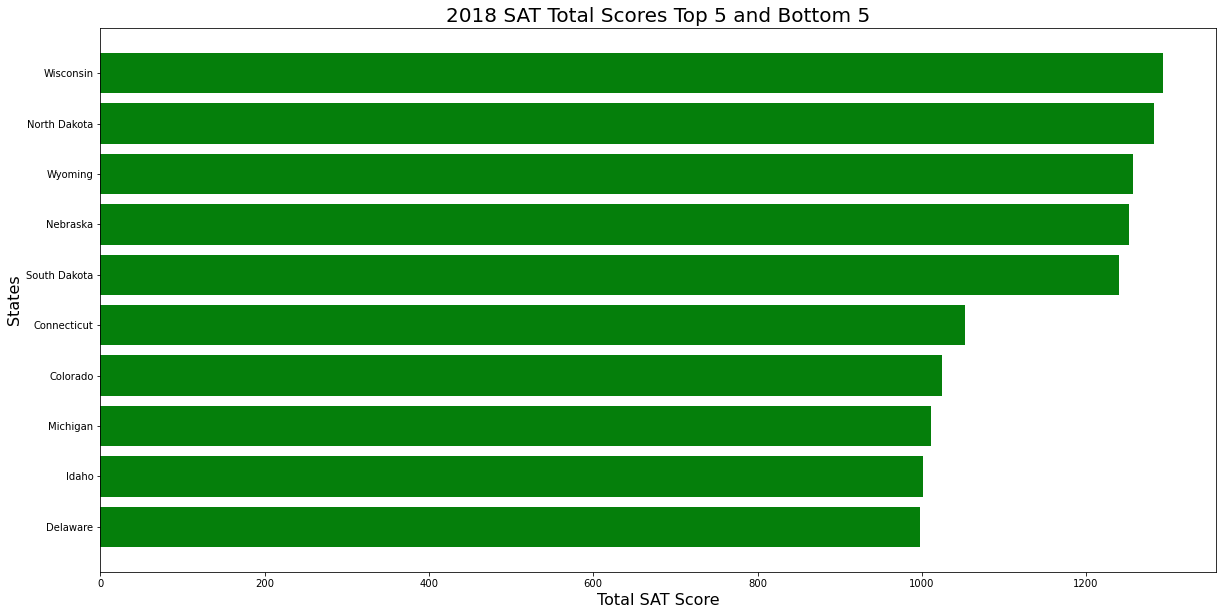

In [165]:
plt.figure(figsize=(20,10));
plt.barh(y=sat_2018_total_sorted['state'], width=sat_2018_total_sorted["2018_total_score"],color='#057f0b');
plt.title('2018 SAT Total Scores Top 5 and Bottom 5',fontsize=20)  
plt.ylabel('States',fontsize=16); 
plt.xlabel('Total SAT Score', fontsize=16);   

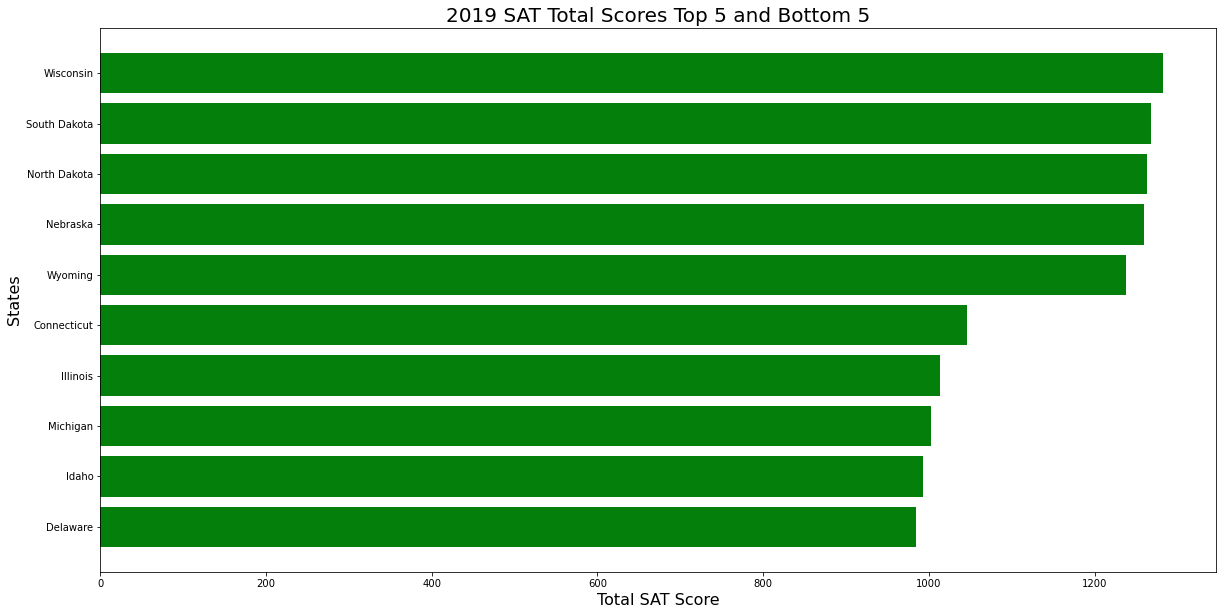

In [166]:
plt.figure(figsize=(20,10));
plt.barh(y=sat_2019_total_sorted['state'], width=sat_2019_total_sorted["2019_total_score"],color='#057f0b');
plt.title('2019 SAT Total Scores Top 5 and Bottom 5',fontsize=20)  
plt.ylabel('States',fontsize=16); 
plt.xlabel('Total SAT Score', fontsize=16);   

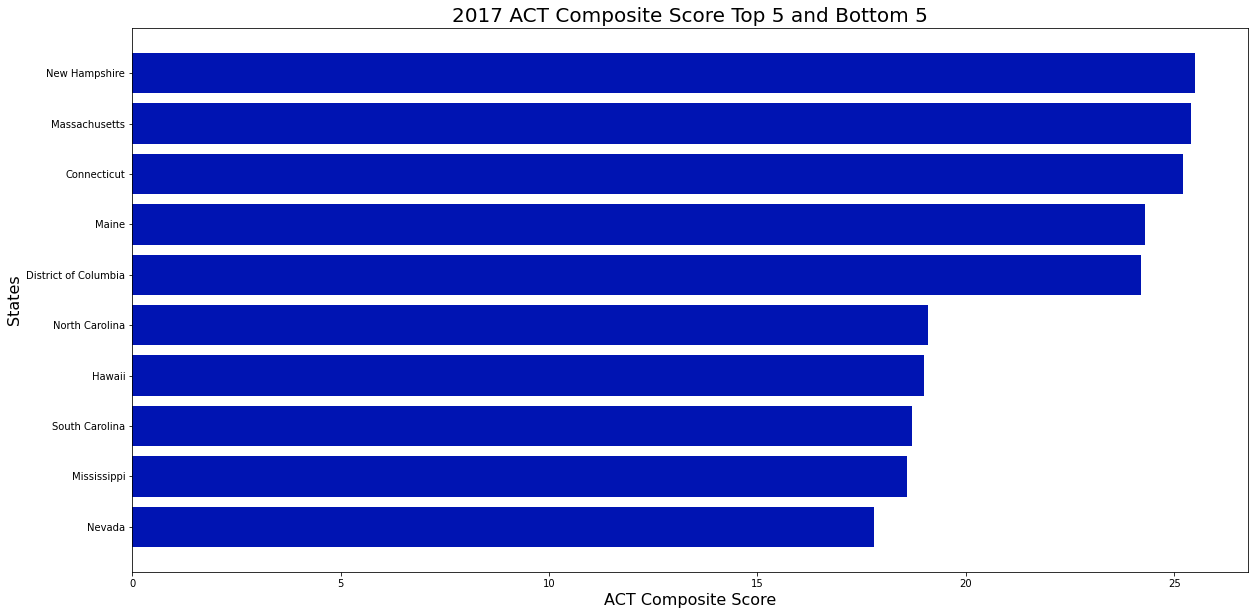

In [167]:
plt.figure(figsize=(20,10));
plt.barh(y=act_2017_comp_sorted['state'], width=act_2017_comp_sorted["2017_composite"],color="#0014b2");
plt.title('2017 ACT Composite Score Top 5 and Bottom 5',fontsize=20)  
plt.ylabel('States',fontsize=16); 
plt.xlabel('ACT Composite Score', fontsize=16);   

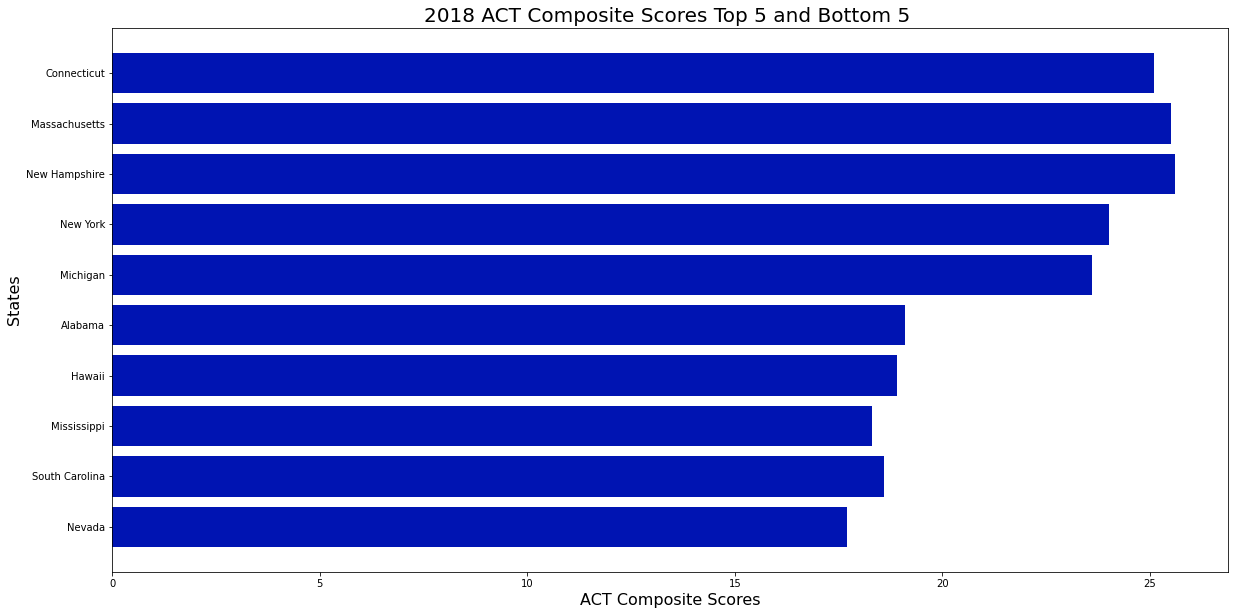

In [168]:
plt.figure(figsize=(20,10));
plt.barh(y=act_2018_comp_sorted['state'], width=act_2017_comp_sorted["2018_composite"],color="#0014b2");
plt.title('2018 ACT Composite Scores Top 5 and Bottom 5 ',fontsize=20);
plt.ylabel('States',fontsize=16); 
plt.xlabel('ACT Composite Scores', fontsize=16);

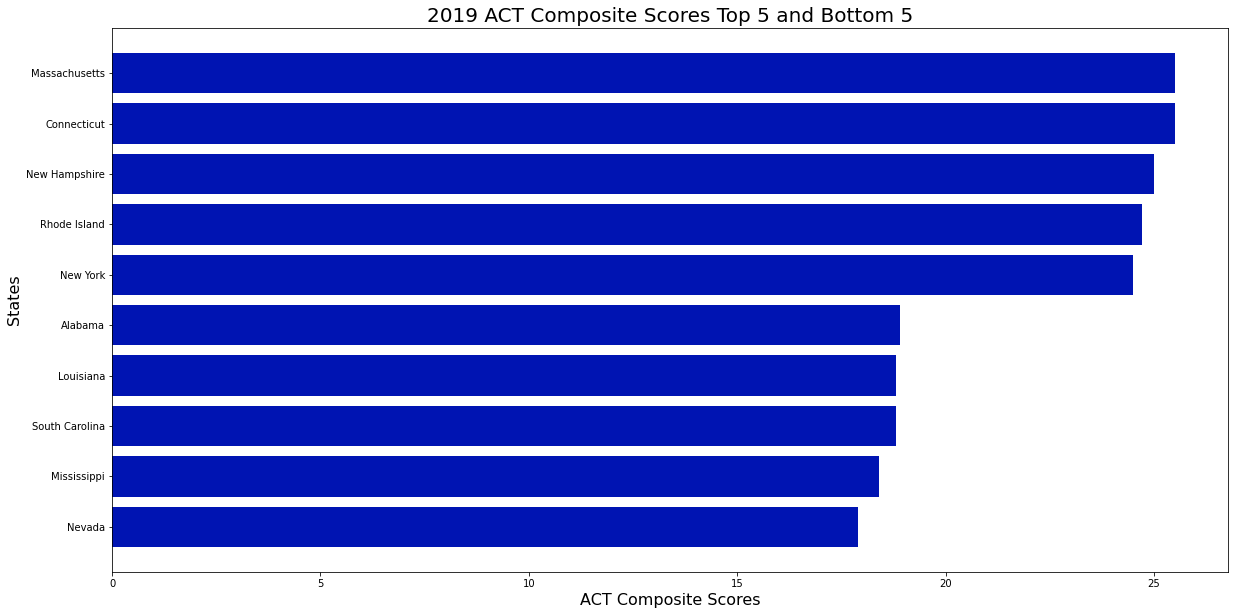

In [169]:
plt.figure(figsize=(20,10));
plt.barh(y=act_2019_comp_sorted['state'], width=act_2019_comp_sorted["2019_composite"],color="#0014b2");
plt.title('2019 ACT Composite Scores Top 5 and Bottom 5',fontsize=20);
plt.ylabel('States',fontsize=16); 
plt.xlabel('ACT Composite Scores', fontsize=16);

In [170]:
#code learning from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html#pandas.DataFrame.corrwith

#### Scatter Plots of participation and scores by year

<AxesSubplot:xlabel='2017_total_score', ylabel='2017_sat_participation'>

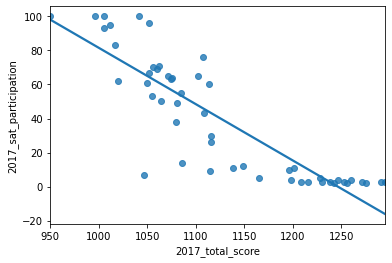

In [171]:
sns.regplot(data=final,x='2017_total_score',y='2017_sat_participation',ci=None)

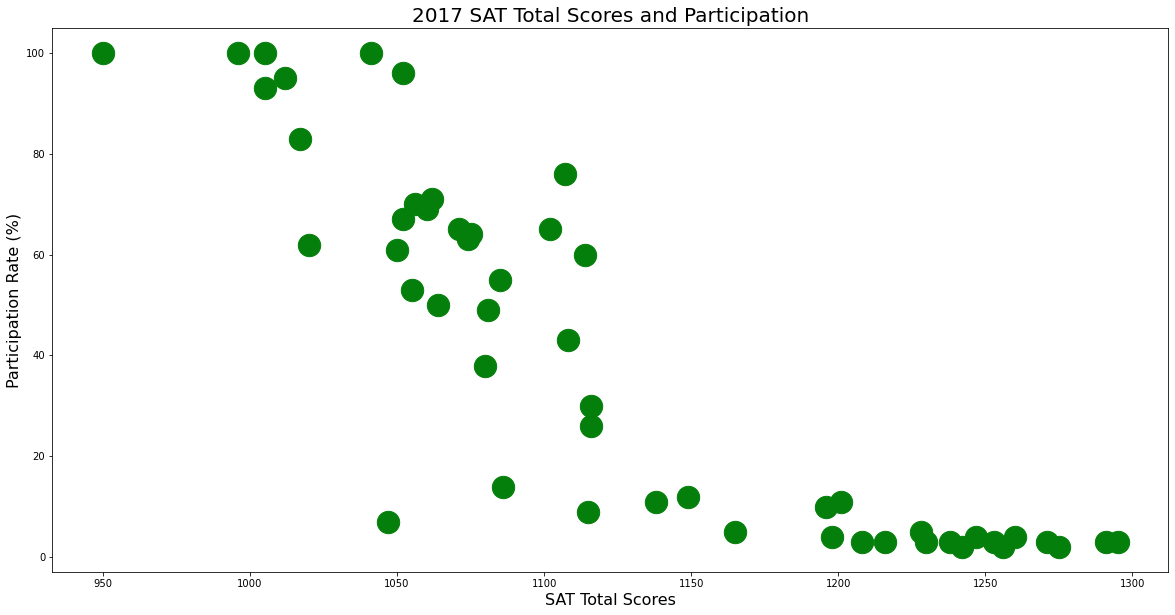

In [188]:
plt.figure(figsize=(20,10));
plt.scatter(final['2017_total_score'], final['2017_sat_participation'],s=500,color='#057f0b')
plt.title("2017 SAT Total Scores and Participation",fontsize=20);
plt.ylabel('Participation Rate (%)',fontsize=16); 
plt.xlabel('SAT Total Scores', fontsize=16);

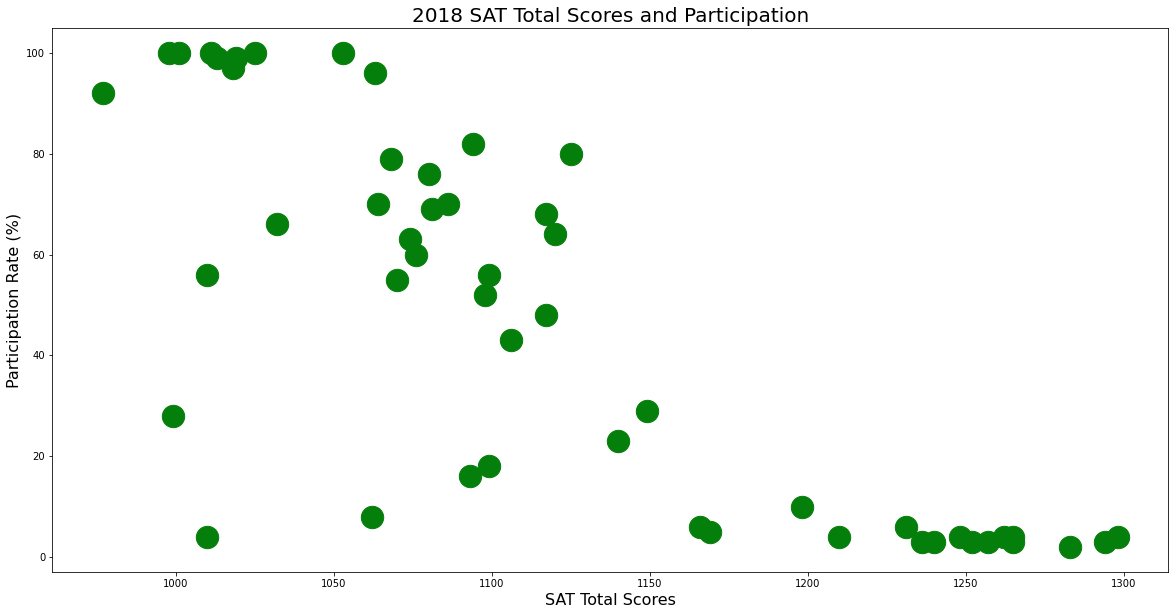

In [189]:
plt.figure(figsize=(20,10));
plt.scatter(final['2018_total_score'], final['2018_sat_participation'],s=500,color='#057f0b')
plt.title("2018 SAT Total Scores and Participation",fontsize=20);
plt.ylabel('Participation Rate (%)',fontsize=16); 
plt.xlabel('SAT Total Scores', fontsize=16);

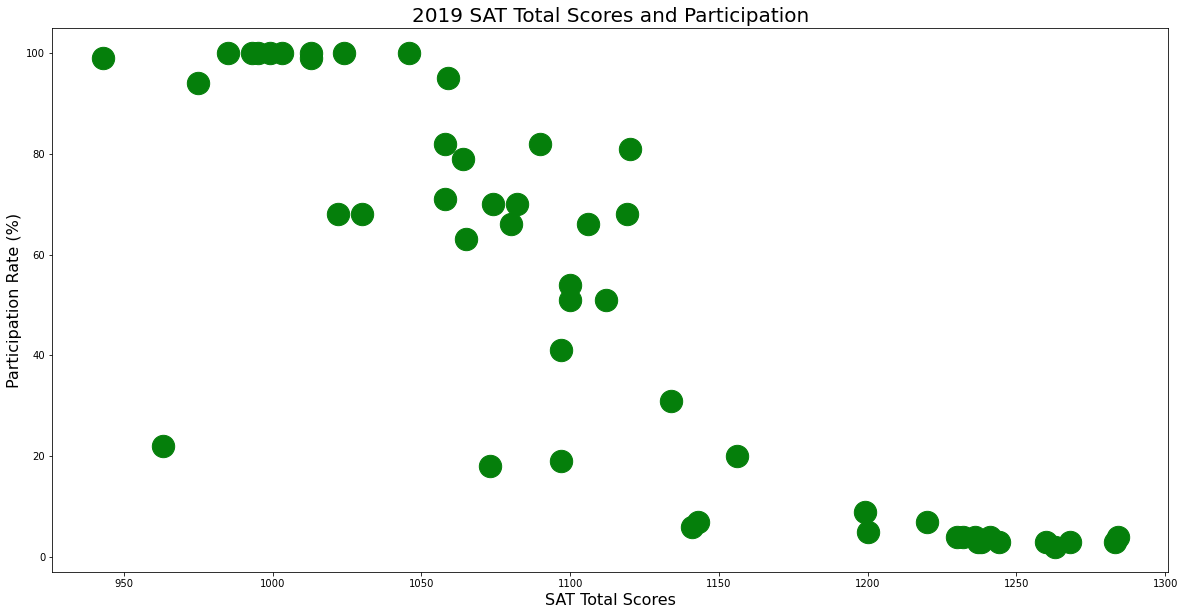

In [190]:
plt.figure(figsize=(20,10));
plt.scatter(final['2019_total_score'], final['2019_sat_participation'],s=500,color='#057f0b')
plt.title("2019 SAT Total Scores and Participation",fontsize=20);
plt.ylabel('Participation Rate (%)',fontsize=16); 
plt.xlabel('SAT Total Scores', fontsize=16);

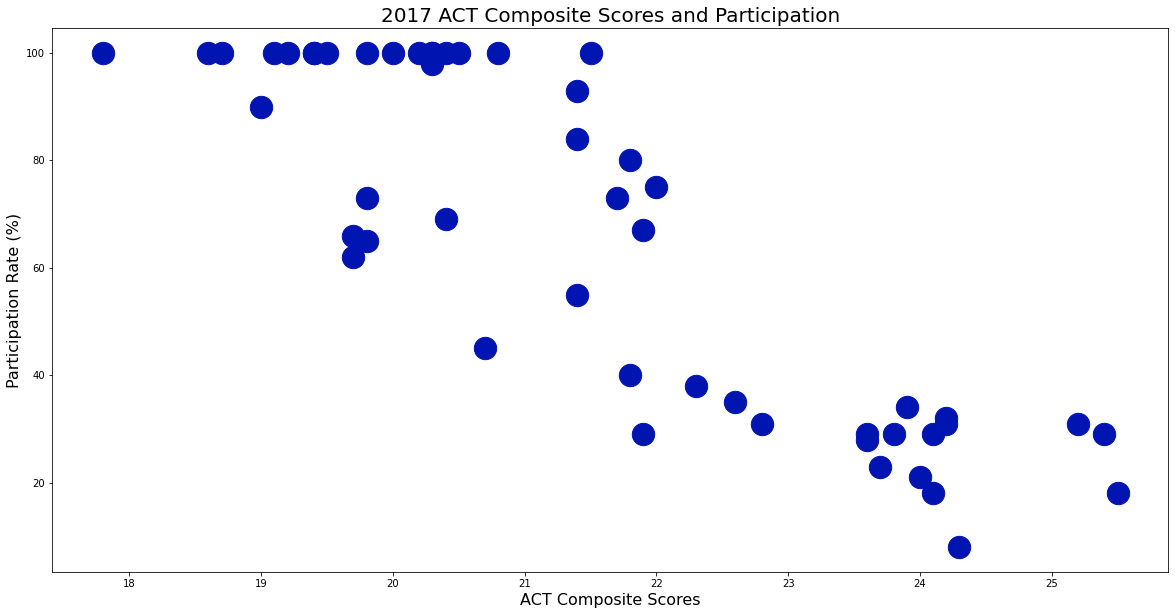

In [191]:
plt.figure(figsize=(20,10));
plt.scatter(final['2017_composite'], final['2017_act_participation'],s=500,color="#0014b2")
plt.title("2017 ACT Composite Scores and Participation",fontsize=20);
plt.ylabel('Participation Rate (%)',fontsize=16); 
plt.xlabel('ACT Composite Scores', fontsize=16);

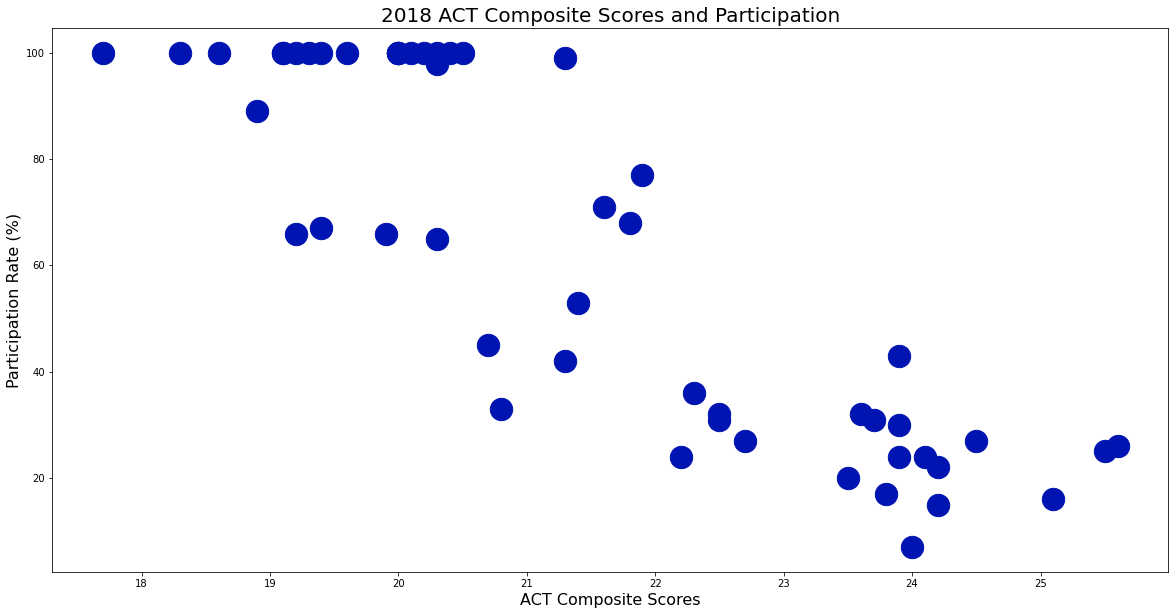

In [192]:
plt.figure(figsize=(20,10));
plt.scatter(final['2018_composite'], final['2018_act_participation'],s=500,color="#0014b2")
plt.title("2018 ACT Composite Scores and Participation",fontsize=20);
plt.ylabel('Participation Rate (%)',fontsize=16); 
plt.xlabel('ACT Composite Scores', fontsize=16);

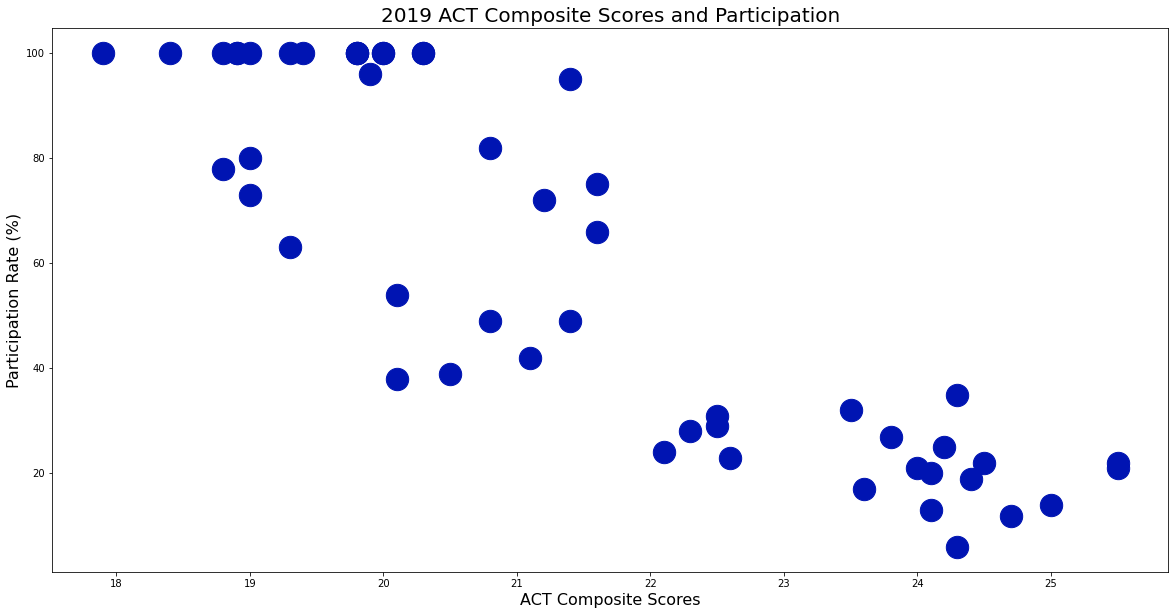

In [193]:
plt.figure(figsize=(20,10));
plt.scatter(final['2019_composite'], final['2019_act_participation'],s=500,color="#0014b2")
plt.title("2019 ACT Composite Scores and Participation",fontsize=20);
plt.ylabel('Participation Rate (%)',fontsize=16); 
plt.xlabel('ACT Composite Scores', fontsize=16);

## Visualize the data

There's not a magic recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Font size is easy to read on a slide
- Plots demonstrate meaningful and valid relationships
- Interpret plots to aid audience understanding

Feel free to make functions to quickly plot relationships (e.g. if you want to make a lot of histograms).



#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

#### Use Seaborn's pairplot for relevant columns

#### Plot and interpret histograms for important columns

#### Plot and interpret scatter plots for import columns


#### Plot and interpret boxplots for important columns


#### Feel free to create and interpret additional plots 

## Outside Research

Based on your observations, choose **one or more** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. 

If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. Make sure that you cite your sources.

In [178]:
#Corrected SAT2017 data https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/
#https://www.collegelifetoday.com/blog/tips/college-not-requiring-sat

## Conclusions and Recommendations

Based on your exploration of the data, what are your 1 or 2 key recommendations for the College Board?

Ensure that your recommendations make sense. These datasets have some limitations - think about granularity, aggregation, the relationships between populations size and rates. Consider the actual populations these data are drawn from. It is okay if your conclusions are tentative. You do not want to make unsupported jumps in logic.

#### College Board and ACT can help prevent lost of revenue in the future in states who are showing high participation and low scores. If they begin offering tutors based on participation rates in a given state, then it will incentivize participation for states and students who do not have access to tutoring and likely lead to higher scores 